# 1.2.1 Getting Started with Images

In [2]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [2]:
resource_path = os.getcwd() + "/resource/"
img = cv2.imread(resource_path + "messi.jpg", 0)

In [5]:
# cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image', img)
k = cv2.waitKey(0)
if k == 27: # 들어온 키 입력이 27번(ESC) 이면...
    cv2.destroyAllWindows()
elif k == ord('s'): # ord함수는 아스키 값을 반환하는 함수이다. s의 아스키 코드
    cv2.imwrite(resource_path + "new_messi.jpg", img)
    cv2.destroyAllWindows()

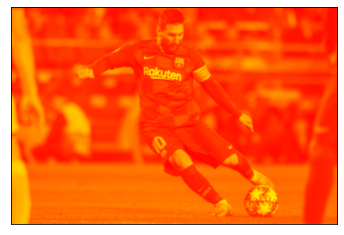

In [10]:
plt.imshow(img, cmap=plt.cm.autumn, interpolation='bicubic')
# cmap -> 픽셀 값에 매핑시켜줄 컬러맵
# interplation -> 보간법 선택
plt.xticks([]), plt.yticks([])
# plot 차트그려주는 라이브러리, 근데 그 가로, 세로 그걸 없애주는거
plt.show()

# 1.2.2 Getting Started with Videos

In [13]:
print(cv2.CAP_PROP_FOURCC)

6


In [15]:
print(cv2.CAP_PROP_FRAME_WIDTH)

3


In [24]:
cap = cv2.VideoCapture(resource_path + "tracking1.avi")
fourcc = int(cap.get(cv2.CAP_PROP_FOURCC))
# opencv2 내에 존재하는 상수명 6번
# CAP_PROP_FOURCC, CAP_PROP_FPS
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = cap.get(cv2.CAP_PROP_FPS)
w = int(cap.get(3))
h = int(cap.get(4))
# VideoWriter 함수로 비디오를 쓸건데 거기 전달되야하는 파라미터를 캡처한 프레임에서 가져온다.
out = cv2.VideoWriter(resource_path + 'output.avi', fourcc, fps, (w, h))

In [25]:
while(cap.isOpened()): # 카메라 영상캡쳐가 초기화 되었는지 여부를 판단 return
    ret, frame = cap.read() # 캡쳐된걸 가져와서
    # print(ret)
    # print(frame)
    
    if ret: # 정상적으로 가져와졌다면
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        out.write(gray)
        cv2.imshow('frame', gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

In [28]:
cv2.imshow('image', img)
k = cv2.waitKey(0)
print(k)

113


In [29]:
print(113 & 0xFF)

113


In [30]:
print(0xFF)

255


In [31]:
print(ord('q'))

113


In [3]:
print(cv2.COLOR_BGR2GRAY)

6


# 1.2.3 Drawing Functions in OpenCV

In [42]:
img = np.zeros((512, 512, 3), np.uint8)
# 512 x 512 x 3채널 ㅇㅅㅇ.. 졸작할때 했던 mat클래스랑 비슷..
img = cv2.line(img, (0,0), (511, 511), (255, 0, 0), 5)
# line 시작점, 끝점, 3채널 컬러 값(레드), 굵기
img = cv2.rectangle(img, (384, 0), (510, 128), (0, 255, 0), -1)
# 사각형, 왼쪽위 꼭지점, 오른쪽아래 꼭지점, 컬러, 굵기
img = cv2.circle(img, (447, 63), 63, (0, 0, 255), -1)
# 원, 중심점, 반지름, 컬러, 선 두께
img = cv2.ellipse(img, (256, 256), (100, 50), 0, 0, 180, (255, 255, 0), -1)
# 타원, 중심점, 축의 절반 길이, 기울기, 시작 각도, 종료 각도, 칼라, 선두께

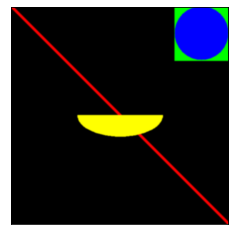

In [49]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [50]:
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
img = cv2.polylines(img, [pts], True, (0, 255, 255))
# 이미지, 좌표 점들, 닫힘 유무, 컬러
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),8,cv2.LINE_AA)
# 이미지, 텍스트, 시작 위치(좌측 하단), 폰트, 폰트 크기, 컬러, 두께, 선 종류

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

In [72]:
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
print(pts)
pts = pts.reshape((-1, 1, 2)) # reshape 공부해볼것!!
print(pts)

[[10  5]
 [20 30]
 [70 20]
 [50 10]]
[[[10  5]]

 [[20 30]]

 [[70 20]]

 [[50 10]]]


# 1.2.4 Mouse as a Paint-Brush

In [73]:
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [75]:
print(cv2.EVENT_FLAG_ALTKEY)

32


In [106]:
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        
        print(flags)
        # 마우스 콜백은 들어온 이벤트 뭔가?? == 더블클릭이면
        # x, y -> 해당 이벤트가 실행될때 마우스 좌표 값
        cv2.circle(img, (x, y), 100, (255, 0, 0), -1)
        # x, y 그리는거지

In [107]:
img = np.zeros((512, 512, 3), np.uint8)
cv2.namedWindow('image') # image라는 윈도우 창을 하나 만듭니다.
cv2.setMouseCallback('image', draw_circle)
# image라는 윈도우 창에 마우스콜백으로 인자로 들어온 함수를 붙입니다.
# 마우스 콜백이라는 거에도 휠업, 휠다운, 더블클릭 다양한 이벤트가 있습니다.

while(1):
    cv2.imshow('image', img)
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

33
1
1
1
1
1


In [84]:
print(cv2.EVENT_FLAG_ALTKEY)

32


In [121]:
def draw_func(event, x, y, flags, param):
    global ix, iy, drawing, mode
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
            else:
                cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
                
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
        else:
            cv2.circle(img, (x, y), 5, (0, 0, 255), -1)

In [122]:
drawing = False
mode = True
ix, iy = -1, -1

In [123]:
img = np.zeros((512, 512, 3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_func)

In [124]:
while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()

# 1.2.5 Trackbar as the Color Palette

In [8]:
def nothing(x):
    global i
    if i == 0:
        i = 1
        img[:] = [255, 255, 255]
    else:
        i = 0
        img[:] = [0, 0, 0]
    

In [9]:
img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow('image')
i = 0

In [10]:
cv2.createTrackbar('R', 'image', 0, 255, nothing)
# R이라는 이름으로 트랙바를 만듭니다.
# 두번째 파라미터 : 창이름
# min, max, 붙은 함수
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('B', 'image', 0, 255, nothing)

In [11]:
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image', 0, 1, nothing)

In [12]:
while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
#     r = cv2.getTrackbarPos('R', 'image')
#     g = cv2.getTrackbarPos('G', 'image')
#     b = cv2.getTrackbarPos('B', 'image')
#     s = cv2.getTrackbarPos(switch, 'image')
    
#     if s == 0:
#         img[:] = 0
#     else:
#         img[:] = [b, g, r]
        
cv2.destroyAllWindows()

# 1.3.1 Basic Operations on Images

In [28]:
resource_path = os.getcwd() + "/resource/"
img = cv2.imread(resource_path + "mountain.jpg")

In [25]:
px = img[100, 100]
print(px)

[212 156  75]


In [20]:
for x in range(100):
    for y in range(50):
        p = img[100+y, 100+x]
        img[100+y, 100+x] = [p[0], 0, 0]

In [27]:
cv2.imshow('image', img)
k = cv2.waitKey(0)
if k == 27:
    cv2.destroyAllWindows()

In [22]:
print(img.item(10, 10, 0)) #blue
# 아이템을 가져와라. 뭘? 10, 10좌표에 0채널을 한마디로 10, 10좌표의 블루색상값을 들고와라
print(img.item(10, 10, 1)) #green
print(img.item(10, 10, 2)) #red
print(img.shape)
# 가로, 세로와 채널
print(img.size)
# 사이즈는?? -> 데이터크기
print(img.dtype)
# 데이터타입 unsigned int 8Bit

212
154
78
(982, 1920, 3)
5656320
uint8


In [26]:
copy = img[780:840, 1330:1390]
img[273:333, 100:160] = copy

In [29]:
b, g, r = cv2.split(img)
print(b)
img = cv2.merge((b, r, g))

[[213 213 213 ... 211 210 210]
 [213 213 213 ... 211 210 210]
 [213 213 213 ... 211 210 210]
 ...
 [ 26  28  61 ...  38   0  45]
 [ 35   0  85 ...  20  47  56]
 [ 34  30  68 ...   5  39  42]]


In [30]:
img[:,:,1] = 0

In [31]:
img1 = cv2.imread(resource_path + "logo.jpg")
BLUE = [0,0,255]

In [ ]:
m = 100
replicate = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REPLICATE)
# 보더를 만듭시다. 어떻게? cv2에 상수로 정의되어 있습니다.
# makeborder(border_type)
# if(border_type == 1) 알고리즘 ~~~
# elif(border_type == 2) 알고리즘 ~~~
# 상하좌우 길이
# REPLICATE -> 자기가진 색을 그대로 가지고 보더를 만듭니다.
reflect = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REFLECT)
# 반사시킵니다.
reflect101 = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REFLECT_101)
# 101 모릅니다.. 차이점을
wrap = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_WRAP)
# 고대로 아까 니가말한거 중심점을 기준으로 -> 바둑판 느낌 생각하시면..
constant= cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_CONSTANT,value=BLUE)
# 색상가지고 다 칠해버리는거

In [33]:
print(cv2.BORDER_REFLECT)

2


# 1.3.2 Arithmetic Operations on Images

In [34]:
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x,y)) # 250+10 = 260 => 255
print(x+y) # 250+10 = 260 % 256 = 4

[[255]]
[4]


In [41]:
# np에는 다양한 메서드있습니다. array, uint8, uint32 여러가지가 있죠.
# 그 타입으로 데이터를 만드세요! uint8형으로 250을 만들겠다!.. 리스트로 만들겠다!

In [42]:
# python에서는 그 범위를 넘어갈경우 나머지를 반환해주는게 +연산자다.
# opencv2 컴퓨터비전 라이브러리니까 메서드를 그림작업에 편하게
# 무조건 맥스값이 넘어가버리면 맥스로 고정시키는 add메서드가 있다.

In [48]:
resource_path = os.getcwd() + "/resource/"
img1 = cv2.imread(resource_path + "weight1.png")
img2 = cv2.imread(resource_path + "weight2.png")
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
def nothing(x):
    pass

In [50]:
cv2.namedWindow('image')
cv2.createTrackbar('alpha', 'image', 0, 255, nothing)
while(1):
    cv2.imshow('image', dst)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    alpha = cv2.getTrackbarPos('alpha', 'image')
    dst = cv2.addWeighted(img1, alpha/255., img2, 1.-alpha/255., 0)
cv2.destroyAllWindows()

In [83]:
# Load two images
img1 = cv2.imread(resource_path + "weight1.png")
img2 = cv2.imread(resource_path + "weight2.png")

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# src1 and src2 and 연산하는데 중요한것은 mask? <-
# 마스크는 무조건 1채널 이진화 이미지만 사용가능합니다.
# 그중 1인 값만 and 연산을 한 결과를 출력할 영역으로 사용한다.

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 1.3.3 Performance Measurement and Improvement Techniques

In [92]:
resource_path = os.getcwd() + "/resource/"
img1 = cv2.imread(resource_path + "mountain.jpg")
e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
    e2 = cv2.getTickCount()
    t = (e2 - e1)/cv2.getTickFrequency()
# Result I got is 0.521107655 seconds

In [93]:
def imageshow(img):
    cv2.imshow('image', img)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()

In [94]:
imageshow(img1)

In [95]:
cv2.namedWindow('image')
cv2.createTrackbar('medianBlur', 'image', 5, 49, nothing)
img1 = cv2.imread(resource_path + "mountain.jpg")
i = 5
while(1):
    i = cv2.getTrackbarPos('medianBlur', 'image')
    i = int(i/2)*2+1
    dst = cv2.medianBlur(img1, i)
    cv2.imshow('image', dst)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

In [98]:
cv2.setUseOptimized(True)
print(cv2.useOptimized())
e1 = cv2.getTickCount()
for i in range(10):
    res = cv2.medianBlur(img1,49)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)

True
3.0633616


In [99]:
cv2.setUseOptimized(False)
print(cv2.useOptimized())
e1 = cv2.getTickCount()
for i in range(10):
    res = cv2.medianBlur(img1,49)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)

False
2.9252695


In [39]:
x = np.uint8([250])

In [40]:
x

array([250], dtype=uint8)

# 1.4.1 Changing Colorspaces

In [101]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

In [105]:
resource_path = os.getcwd() + "/resource/"
cap = cv2.VideoCapture(resource_path + "tracking1.avi")

In [ ]:
while(1):
    # Take each frame
    ret, frame = cap.read()
    if ret == True:
        # Convert BGR to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # define range of blue color in HSV
        lower_blue = np.array([0,40,40])
        upper_blue = np.array([20,60,60])
        # Threshold the HSV image to get only blue colors
        mask = cv2.inRange(hsv, lower_blue, upper_blue)
        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(frame,frame, mask = mask)
        cv2.imshow('frame',frame)
        cv2.imshow('mask',mask)
        cv2.imshow('res',res)
        k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

In [ ]:
img1 = cv2.imread(resource_path + "mountain.jpg")
# 이미지콜
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
# hsv로 바꾸고
lower_blue = np.array([0,40,40])
upper_blue = np.array([20,60,60])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
print(mask)

In [2]:
def nothing(x):
    pass

In [ ]:
cv2.namedWindow('image')
cv2.createTrackbar('hue', 'image', 0, 360, nothing)
cap = cv2.VideoCapture(resource_path + "tracking1.avi")
font = cv2.FONT_HERSHEY_SIMPLEX
while(1):
    hue = cv2.getTrackbarPos('hue', 'image')
    # Take each frame
    ret, frame = cap.read()
    if ret == True:
        # Convert BGR to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # define range of blue color in HSV
        lower_blue = np.array([hue-50,0,0])
        upper_blue = np.array([hue+50,100,100])
        # Threshold the HSV image to get only blue colors
        mask = cv2.inRange(hsv, lower_blue, upper_blue)
        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(frame,frame, mask=mask)
        msg = "hue: " + str(hue)
        cv2.putText(frame, msg, (10, 30), font, 0.6, (255, 255, 255), 1, cv2.LINE_AA)
        # 이미지, 텍스트, 좌표, 폰트, 크기, 컬러, 굵기, 선종류
        cv2.imshow('image',frame)
        cv2.imshow('mask',mask)
        cv2.imshow('res',res)
    k = cv2.waitKey(100) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

# 1.4.2 Image Thresholding

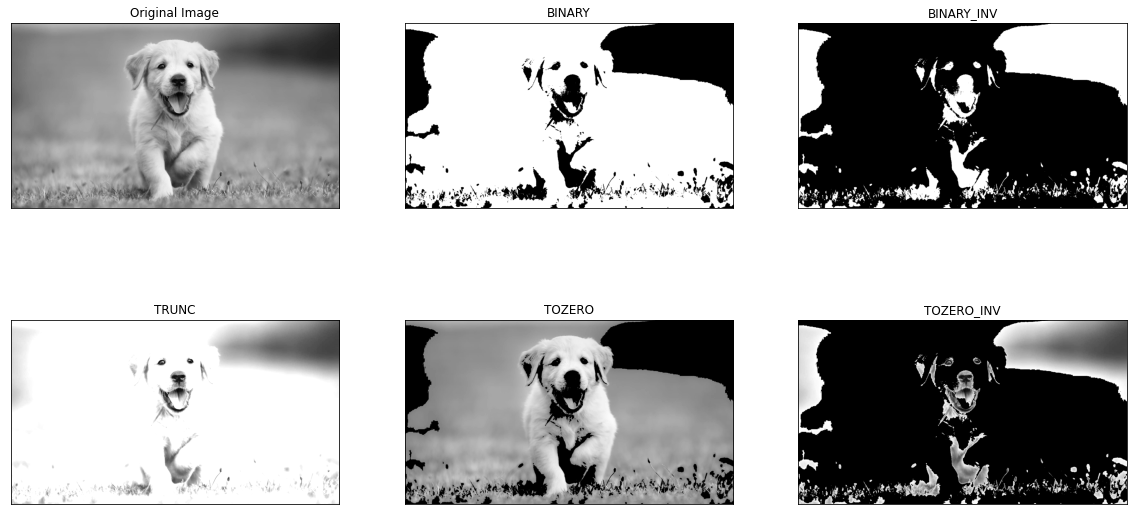

In [5]:
resource_path = os.getcwd() + "/resource/"
img = cv2.imread(resource_path + "dog.jpg", 0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [9]:
h, w=256,512
img = np.zeros((h, w), np.uint8)
for i in range(h):
    for j in range(w):
        img[i, j] = j % 256

In [11]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

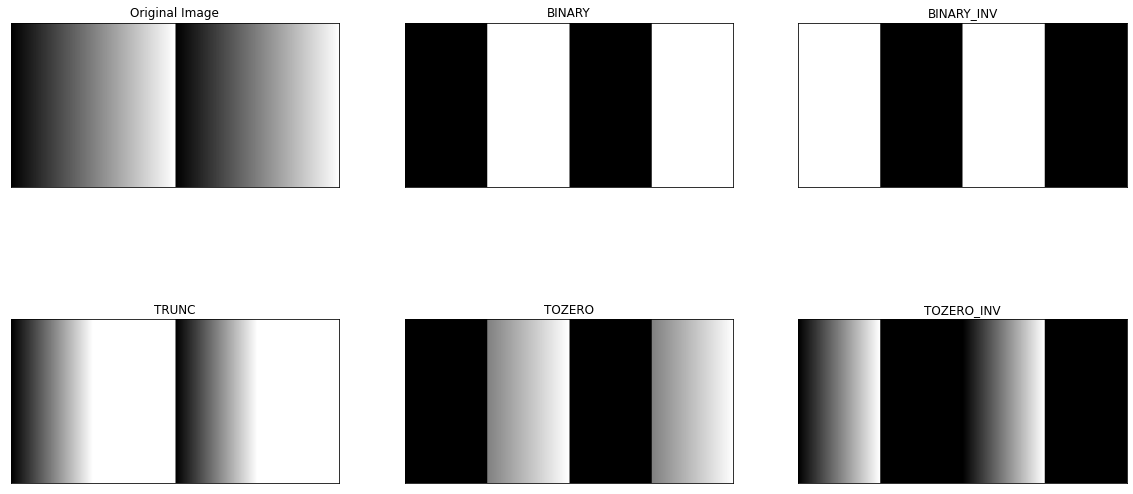

In [12]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Adaptive Thresholding

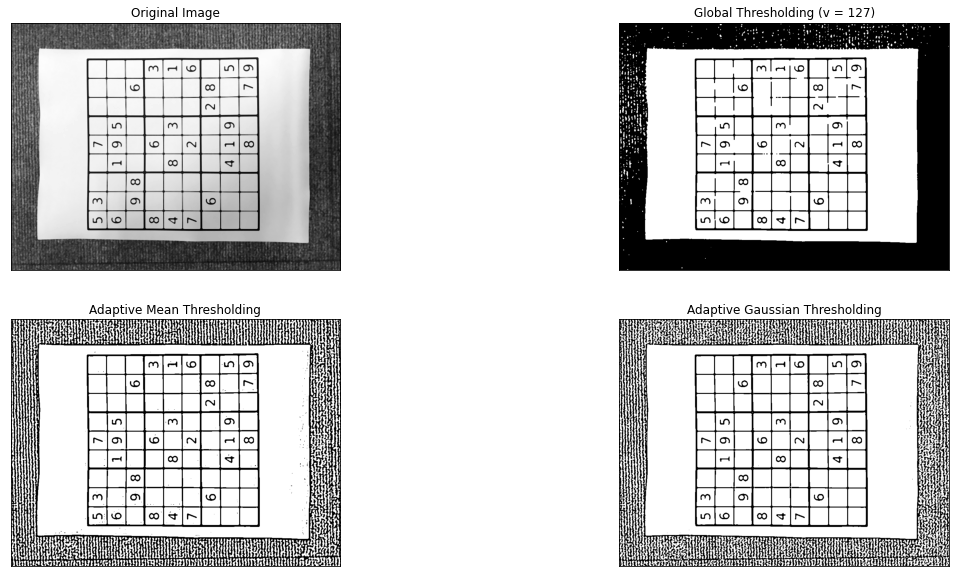

In [13]:
img = cv2.imread(resource_path + "sIMG_2164.jpg", 0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu’s Binarization

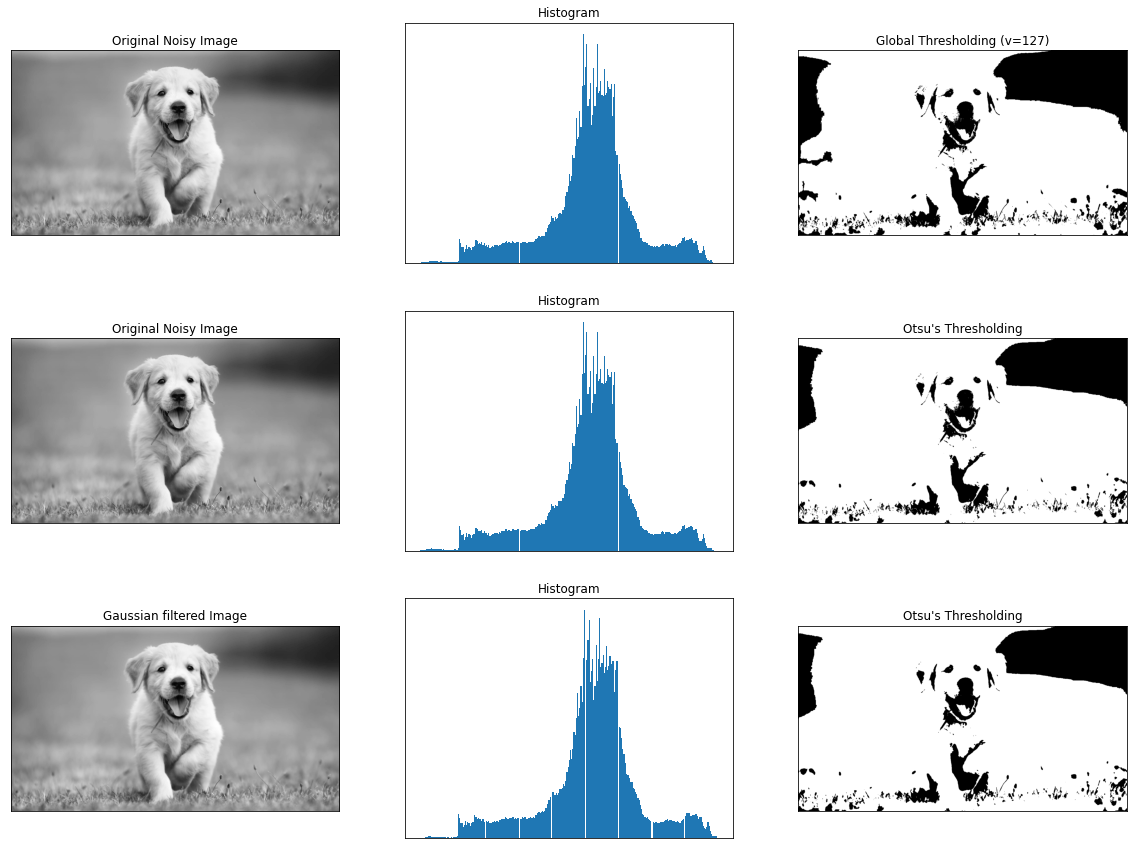

In [14]:
img = cv2.imread(resource_path + "dog.jpg", 0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,img, 0, th2,blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)','Original Noisy Image','Histogram',
          "Otsu's Thresholding",'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## Histogram

In [21]:
img = cv2.imread(resource_path + "sIMG_2168.jpg", 0)
h, w = img.shape
hist = np.zeros(256, np.uint32)
hist

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

In [22]:
for i in range(h):
    for j in range(w):
        hist[img[i, j]] += 1

In [23]:
hist

array([    0,     0,     3,     8,    38,   102,   233,   431,   648,
         973,  1322,  1749,  2210,  2608,  2876,  2825,  2571,  2241,
        2101,  1924,  1895,  1855,  2095,  2507,  2807,  3268,  3771,
        4172,  4498,  4782,  4908,  5352,  5550,  5755,  6142,  6265,
        6360,  6304,  6298,  6194,  6035,  5897,  5534,  5448,  5138,
        4854,  4689,  4341,  4264,  3894,  3738,  3667,  3418,  3410,
        3154,  3121,  3010,  2881,  2651,  2572,  2481,  2378,  2185,
        2072,  2071,  1898,  1905,  1751,  1769,  1712,  1736,  1584,
        1535,  1420,  1430,  1382,  1328,  1290,  1306,  1286,  1216,
        1204,  1148,  1107,  1148,  1098,  1059,   992,   997,  1059,
         964,   920,   960,   957,   965,   891,   929,   914,   929,
         883,   885,   888,   840,   848,   800,   825,   822,   815,
         799,   800,   782,   771,   771,   766,   805,   798,   817,
         799,   747,   733,   776,   866,   872,   981,  1171,  1620,
        2403,  3761,

## Exercise Draw Histogram

In [26]:
h, w, ch = 256, 512, 3
histImage = np.zeros((h, w, 3), np.uint8)

In [27]:
for i in range(256):
    l = (int)((hist[i] / 10000) * 255)
    histImage = cv2.rectangle(histImage, (2 * i, h - 0), (2 * i + 2, h - l), (0, 255, 0), 1)

In [28]:
cv2.imshow('image',histImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

## with Noise

In [30]:
import random
h, w = 256, 512
img = np.zeros((h, w), np.uint8)
# 이미지로 쓸 2차원 배열을 만든다는거
for i in range(h):
    for j in range(w):
        img[i, j] = j % 256
        # 이미지에 뭔가 색상을 채워줄려고 값을 넣는거지
        # 값은 가로의 256 나머지

In [31]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
for i in range((int)(h / 2)):
    for j in range((int)(w / 2)):
        img[i + int(h / 4), j + int(w / 4)] = 32

In [33]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
noiseImg = np.copy(img)
m = 64
for i in range(h):
    for j in range(w):
        value = img[i, j] + random.randint(-m, m)
        if value < 0:
            noiseImg[i, j] = 0
        elif value > 255:
            noiseImg[i, j] = 255
        else :
            noiseImg[i, j] = value

In [41]:
cv2.imshow('noise image',noiseImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

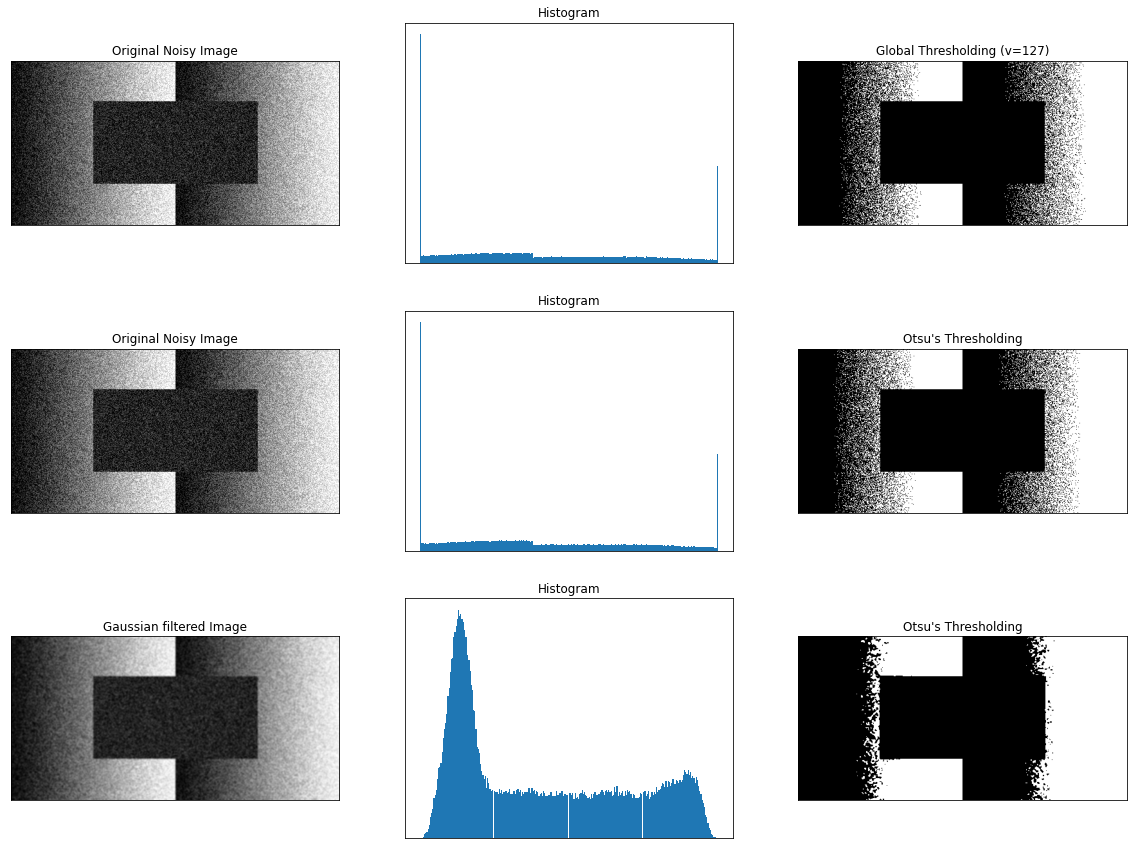

In [43]:
# global thresholding
ret1,th1 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(noiseImg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(noiseImg,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [noiseImg, 0, th1, noiseImg, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)','Original Noisy Image','Histogram',
          "Otsu's Thresholding",'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# 1.4.3 Geometric Transformations of Images

## Scaling

In [44]:
resource_path = os.getcwd() + "/resource/"
img = cv2.imread(resource_path + "dog.jpg")
resN = cv2.resize(img, None, fx = 2, fy = 2, interpolation = cv2.INTER_NEAREST)
resC = cv2.resize(img, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)

In [45]:
cv2.imshow('resN',resN)
cv2.imshow('resC',resC)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Translation

In [47]:
img = cv2.imread(resource_path + "dog.jpg", 1)
tx = 100
ty = 150
rows, cols, ch = img.shape
M = np.float32([[1, 0, tx],[0, 1, ty]])
dst = cv2.warpAffine(img, M, (cols, rows))
dst = cv2.rectangle(dst,(0,0),(tx, ty),(0,255,0),-1)
cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
tx = 100
ty = 150
rows, cols, ch = img.shape
M = np.float32([[1, 0, tx],[0, 1, ty]])
print(M)

[[  1.   0. 100.]
 [  0.   1. 150.]]


In [51]:
img = cv2.imread(resource_path + "dog.jpg", 1)
cx = 100
cy = 200
theta = 45
rows, cols, ch = img.shape
M = cv2.getRotationMatrix2D((cy, cx), theta, 1)
dst = cv2.warpAffine(img, M, (cols, rows))
dst = cv2.circle(dst,(cx, cy), 10, (0, 0, 255), -1)
cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
print(M)

[[  0.70710678   0.70710678 -12.13203436]
 [ -0.70710678   0.70710678 170.71067812]]


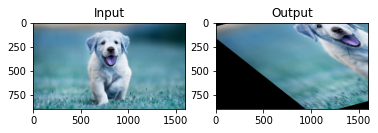

In [52]:
img = cv2.imread(resource_path + "dog.jpg")
rows, cols, ch = img.shape
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [200, 250]])
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')
plt.show()

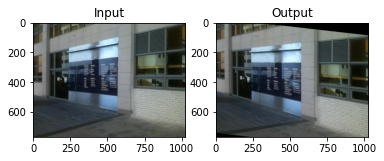

In [53]:
img = cv2.imread(resource_path + "dsu4.jpg")
rows, cols, ch = img.shape
pts1 = np.float32([[235, 457], [238, 269], [569, 231]])
pts2 = np.float32([[235, 457], [235, 269], [569, 269]])
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')
plt.show()

In [54]:
cv2.imshow('simg', img)
cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Perspective Transformation

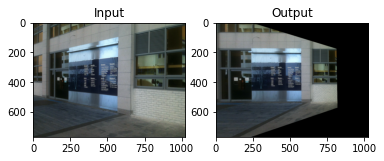

In [55]:
img = cv2.imread(resource_path + "dsu4.jpg")
rows, cols, ch = img.shape
pts1 = np.float32([[235, 457], [238, 269], [569, 231], [564, 493]])
pts2 = np.float32([[235, 457], [235, 270], [570, 270], [570, 457]])
# M = cv2.getAffineTransform(pts1, pts2)
M = cv2.getPerspectiveTransform(pts1, pts2)
# dst = cv2.warpAffine(img, M, (cols, rows))
dst = cv2.warpPerspective(img, M, (cols, rows))
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')
plt.show()

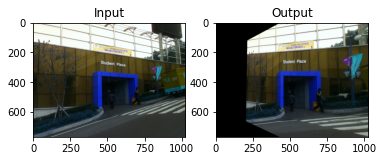

In [56]:
img = cv2.imread(resource_path + "dsu6.jpg")
rows, cols, ch = img.shape
pts1 = np.float32([[435, 581], [430, 328], [699, 350], [708, 536]])
pts2 = np.float32([[430, 581], [430, 328], [699, 328], [708, 581]])
# M = cv2.getAffineTransform(pts1, pts2)
M = cv2.getPerspectiveTransform(pts1, pts2)
# dst = cv2.warpAffine(img, M, (cols, rows))
dst = cv2.warpPerspective(img, M, (cols, rows))
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')
plt.show()

In [57]:
cv2.imshow('simg', img)
cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 1.4.4 Smoothing Images

## 2D Convolution ( Image Filtering )

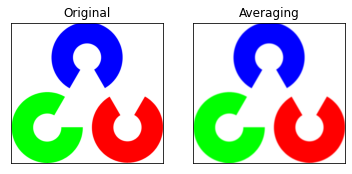

In [58]:
resource_path = os.getcwd() + "/resource/"
img = cv2.imread(resource_path + "weight1.png")
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [60]:
cv2.imshow('dst',dst)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

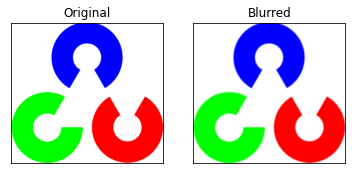

In [61]:
blur = cv2.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [62]:
cv2.imshow('dst',dst)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2. Gaussian Filtering

In [63]:
blur = cv2.GaussianBlur(img,(5,5),0)

In [64]:
cv2.imshow('dst',blur)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 3. Median Filtering

In [67]:
median = cv2.medianBlur(img,5)

In [ ]:
cv2.imshow('dst',blur)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 4. Bilateral Filtering

In [70]:
blur = cv2.bilateralFilter(img,9,75,75)

In [71]:
cv2.imshow('dst',blur)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 1.4.5 Morphological Transformations

## 1. Erosion

In [72]:
resource_path = os.getcwd() + "/resource/"
img = cv2.imread(resource_path + "dog.jpg")
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

In [73]:
cv2.imshow('img',img)
cv2.imshow('erosion',erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2. Dilation

In [74]:
resource_path = os.getcwd() + "/resource/"
img = cv2.imread(resource_path + "dog.jpg")
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)

In [75]:
cv2.imshow('img',img)
cv2.imshow('erosion',erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 3. Opening

In [76]:
resource_path = os.getcwd() + "/resource/"
img = cv2.imread(resource_path + "dog.jpg")
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

In [77]:
cv2.imshow('img',img)
cv2.imshow('opening',opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 4. Closing

In [78]:
resource_path = os.getcwd() + "/resource/"
img = cv2.imread(resource_path + "dog.jpg")
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

In [79]:
cv2.imshow('img',img)
cv2.imshow('opening',opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 5. Morphological Gradient

In [80]:
resource_path = os.getcwd() + "/resource/"
img = cv2.imread(resource_path + "dog.jpg")
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

In [81]:
cv2.imshow('img',img)
cv2.imshow('opening',opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 6. Top Hat

In [83]:
resource_path = os.getcwd() + "/resource/"
img = cv2.imread(resource_path + "dog.jpg")
kernel = np.ones((5,5),np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

In [84]:
cv2.imshow('img',img)
cv2.imshow('opening',opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 7. Black Hat

In [85]:
resource_path = os.getcwd() + "/resource/"
img = cv2.imread(resource_path + "dog.jpg")
kernel = np.ones((5,5),np.uint8)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

In [86]:
cv2.imshow('img',img)
cv2.imshow('opening',opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [87]:
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [94]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [90]:
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

## Homework1

In [95]:
resource_path = os.getcwd() + "/resource/"
img = cv2.imread(resource_path + "mountain.jpg")

In [96]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
cMode = 0
ix,iy = -1,-1
cx,cy = -1,-1
font = cv2.FONT_HERSHEY_SIMPLEX

In [97]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,cx,cy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
        cx,cy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
#             if mode == True:
            cx,cy = x,y
#                 cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),0)
#             else:
#                 cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
#         if mode == True:
        cx, cy = x,y
#             cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),0)
#         else:
#             cv2.circle(img,(x,y),5,(0,0,255),-1)
            
def nothing(x):
    pass

In [100]:
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
cv2.createTrackbar('value','image',0,255,nothing)

while(1):
    img = cv2.imread(resource_path + "mountain.jpg")
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
        ix,iy = -1, -1
    elif k == ord('c'):
        cMode += 1
        if cMode > 3:
            cMode = 0
    elif k == 27:
        break
    value = cv2.getTrackbarPos('value', 'image')
    if ix != -1 and iy != -1:
        if mode:
            cv2.rectangle(img,(ix,iy),(cx,cy),(0,255,0),0)
            clip = img[iy:cy,ix:cx]
            if cMode == 1:
                clip[:,:,1] = 0
                clip[:,:,2] = 0
            elif cMode == 2:
                clip[:,:,0] = 0
                clip[:,:,2] = 0
            elif cMode == 3:
                clip[:,:,0] = 0
                clip[:,:,1] = 0
        else:
            cv2.circle(img,(cx,cy),8,(255,0,0),0)
            if cMode == 1:
                cv2.circle(img,(cx,cy),6,(255,0,0),-1)
            elif cMode == 2:
                cv2.circle(img,(cx,cy),6,(0,255,0),-1)
            elif cMode == 3:
                cv2.circle(img,(cx,cy),6,(0,0,255),-1)   
        
    msg = "Mouse position ("+str(ix)+","+str(iy)+") - ("+str(cx)+","+str(cy)+") - "+str(value)+" - "+str(mode)+" - "+str(cMode)
    cv2.putText(img,msg,(10,30),font,.6,(255,255,255),1,cv2.LINE_AA)
    cv2.imshow('image',img)
cv2.destroyAllWindows()

## Homework2

In [ ]:
resource_path = os.getcwd() + "/resource/"
cap = cv2.VideoCapture(resource_path + "tracking1.avi")
while(1):
    # Take each frame
    ret, frame = cap.read()
    if ret == True:
        # Convert BGR to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # define range of red color in HSV
        lower_red = np.array([150, 100, 100])
        upper_red = np.array([180, 255, 255])
        # Threshold the HSV image to get only red colors
        mask = cv2.inRange(hsv, lower_red, upper_red)
        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(frame,frame, mask = mask)
        cv2.imshow('frame',frame)
        cv2.imshow('mask',mask)
        cv2.imshow('res',res)
        k = cv2.waitKey(40) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

## Homework3

In [3]:
resource_path = os.getcwd() + "/resource/"
img = cv2.imread(resource_path + "sIMG_8253.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
gray_blur = cv2.GaussianBlur(gray, (19, 19), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 3, 1)

In [17]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 19)

In [18]:
cv2.imshow('img', closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
cont_img = closing.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
count = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 10000:
        continue
    count = count + 1
    print(area)
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img, ellipse, (0,255,0), 10)
print("동전 개수 : " + str(count))

6250.0
5329.5
5073.5
5564.5
4720.0
동전 개수 : 5


In [9]:
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

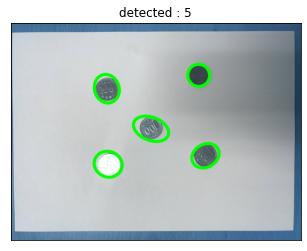

In [10]:
plt.title('detected : ' + str(count))
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.show()

## Homework4

In [19]:
resource_path = os.getcwd() + "/resource/"

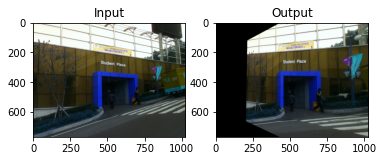

In [20]:
img = cv2.imread(resource_path + "dsu6.jpg")
rows, cols, ch = img.shape
pts1 = np.float32([[435, 581], [430, 328], [699, 350], [708, 536]])
pts2 = np.float32([[430, 581], [430, 328], [699, 328], [708, 581]])
# M = cv2.getAffineTransform(pts1, pts2)
M = cv2.getPerspectiveTransform(pts1, pts2)
# dst = cv2.warpAffine(img, M, (cols, rows))
dst = cv2.warpPerspective(img, M, (cols, rows))
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')
plt.show()

In [21]:
cv2.imshow('simg', img)
cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()